<a href="https://colab.research.google.com/github/JunnieLee/data_science_tutorials/blob/master/Intro_to_Data_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 1. Data Analysis Process

**< Data Analysis Process>**
- Question -- Wrangle -- Explore -- Draw Conclusions -- Communicate

> Data Acquisition
- Downloading files
- Accessing an API
- Scraping a webpage
- Combine data from different formats



---


# [1] Load Data From CSVs

In [9]:
from google.colab import files

file1 = files.upload()

Saving enrollments.csv to enrollments.csv


In [7]:
!pip install unicodecsv

In [10]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()


with open('enrollments.csv', 'rb') as f: 
  reader = unicodecsv.DictReader(f) # this means that each row is going to be a dictionary
                                    # refer to each column by its name, rather than its number
  enrollments = list(reader)

enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

In [11]:
file2 = files.upload()

Saving daily_engagement.csv to daily_engagement.csv


In [12]:
file3 = files.upload()

Saving project_submissions.csv to project_submissions.csv


In [0]:
with open('daily_engagement.csv', 'rb') as f: 
  reader = unicodecsv.DictReader(f)
  daily_engagement = list(reader)
  
with open('project_submissions.csv', 'rb') as f: 
  reader = unicodecsv.DictReader(f)
  project_submissions = list(reader)

In [14]:
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', '2015-01-09'),
             ('num_courses_visited', '1.0'),
             ('total_minutes_visited', '11.6793745'),
             ('lessons_completed', '0.0'),
             ('projects_completed', '0.0')])

In [15]:
project_submissions[0]

OrderedDict([('creation_date', '2015-01-14'),
             ('completion_date', '2015-01-16'),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])



---


# **[2] Fixing Data Types**

In [0]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

In [17]:
# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True' # is_canceled 값이 True면 최종값이 True, 아니면 False
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True' # is_udacity 값이 True면 최종값이 True, 아니면 False
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [18]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [19]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

# [3] Investigating the Data

In [0]:
# column name 통일시키기

for engagement_record in daily_engagement:
  engagement_record['account_key'] = engagement_record['acct']
  del [engagement_record['acct']]

In [0]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students
  
unique_enrolled_students = get_unique_students(enrollments)
unique_engagement_students = get_unique_students(daily_engagement)
unique_project_submitters = get_unique_students(project_submissions)

In [24]:
### For each of these three tables, find the number of rows in the table and
### the number of unique students in the table. To find the number of unique
### students, you might want to create a set of the account keys in each table.

enrollment_num_rows = len(enrollments)
engagement_num_rows = len(daily_engagement)
submission_num_rows = len(project_submissions)

print("enrollment_num_rows :"+str(enrollment_num_rows))
print("enrollment_num_unique_students :"+str(len(unique_enrolled_students)))

print("engagement_num_rows :"+str(engagement_num_rows))
print("engagement_num_unique_students :"+str(len(unique_engagement_students)))

print("submission_num_rows :"+str(submission_num_rows))
print("submission_num_unique_students"+str(len(unique_project_submitters)))

enrollment_num_rows :1640
enrollment_num_unique_students :1302
engagement_num_rows :136240
engagement_num_unique_students :1237
submission_num_rows :3642
submission_num_unique_students743


In [25]:
# why are students missing from daily-engagement?

for enrollment in enrollments:
  student = enrollment['account_key']
  if student not in unique_engagement_students:
    print (enrollment)
    break # 일단 한명만 print하고 loop exit
    
# 하루도 못버티고(?) 탈퇴하면 enroll은 했지만 engage는 안한게 되어서 그렇더라!

OrderedDict([('account_key', '1219'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])


In [26]:
cnt = 0
for enrollment in enrollments:
  student = enrollment['account_key']
  if student not in unique_engagement_students:
    cnt+=1

print(cnt) # 하루도 못 채우고 탈퇴한 사람들 수

71


# [4] Tracking Down the Remaining Problems

In [27]:
num_problem_students = 0
for enrollment in enrollments:
  student = enrollment['account_key']
  if (student not in unique_engagement_students) and (enrollment['join_date'] != enrollment['cancel_date']):
    num_problem_students+=1

print(num_problem_students)

3


In [28]:
# Create a set of the account keys for all Udacity test accounts

udacity_test_accounts = set()

for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
        
len(udacity_test_accounts)

6

In [0]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts

def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [30]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print (len(non_udacity_enrollments))
print (len(non_udacity_engagement))
print (len(non_udacity_submissions))

1622
135656
3634


# [5] Refining the Question

In [31]:
## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = dict()

for student in non_udacity_enrollments:
  
  if not student['is_canceled'] or student['days_to_cancel'] > 7:
    account_key = student['account_key']
    enrollment_date = student['join_date']
    
    # 한사람이 여러번 enroll한 경우 가장 최신의 데이터만 저장
    if (account_key not in paid_students) or (enrollment_date > paid_students[account_key]):
      paid_students[account_key] = enrollment_date
      

len(paid_students)

995

# [6] Getting Data from First Week

In [0]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0 # engagement date이 join date이후에 존재하는 경우만 다루자!
                                                        # 만들었던 사람이 없앴다가 다시 만들었다가 하는경우는 고려 X

In [0]:
def remove_free_trial_cancels(data):
  new_data = []
  
  for data_point in data:
    if data_point['account_key'] in paid_students:
      new_data.append(data_point)
      
  return new_data   

In [0]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

In [35]:
print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))

1293
134549
3618


In [36]:
## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []

for engagement_record in paid_engagement:
  account_key = engagement_record['account_key']
  join_date = paid_students[account_key]
  engagement_date = engagement_record['utc_date']
  
  if within_one_week(join_date, engagement_date):
    paid_engagement_in_first_week.append(engagement_record)
    
len(paid_engagement_in_first_week)

6919

# [7] Exploring Student Engagement

In [0]:
# 첫번째 week에 평균적으로 학생들이 class를 듣는데 몇분정도 투자하는지 한번 알아보자!

from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.

engagement_by_account = defaultdict(list) # 해당 키가 없으면 빈 list가 반환되도록 디폴트값을 설정해줌
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)
# -> group the engagement data with the account key.

In [0]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

total_minutes_by_account = {}

# 한명씩 engagement들에서 총 분을 소요했는지 모아서 확인해보자!
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0   
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']                                           
    total_minutes_by_account[account_key] = total_minutes

In [0]:
total_minutes = list(total_minutes_by_account.values()) # 이제 account_key는 irrelevant하니까 그냥 .values()로 값에 접근!

In [40]:
import numpy as np

# Summarize the data about minutes spent in the classroom

print ('Mean:', np.mean(total_minutes))
print ('Standard deviation:', np.std(total_minutes))
print ('Minimum:', np.min(total_minutes))
print ('Maximum:', np.max(total_minutes))

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


In [0]:
# ?? Maximim의 값을 보면, 일주일동안 가능한 minute 수를 초과했다!!
# 무엇이 문제일까?!
# --> within_one_week function에 문제가 있더라~
# --> engagement date이 join date보다 앞에 있는 경우도 포함해가지고 이런 오류가 생긴것이더라~
# --> 그래서 function 코드 수정해줌!

# [8] Debugging Data Analysis Code

In [42]:
student_with_max_values = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
  if total_minutes > max_minutes:
    max_minutes = total_minutes
    student_with_max_values = student

print(max_minutes)

3564.7332644989997


In [43]:
for engagement_record in paid_engagement_in_first_week:
  if engagement_record['account_key'] == student_with_max_values:
    print(engagement_record)

OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.519339666), ('lessons_completed', 4), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.633923334), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.018903666), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 294.568774), ('lessons_completed', 2), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 13, 0, 0)), ('num_courses_visited', 3), ('total_minutes_visited', 471.2139785), ('lessons_completed

In [0]:
# 드디어 이제야! 일주일간의 기록을 보면 총 7번의 entry가 있음을 확인할 수 있지!

# [9] Lessons Completed in First Week

In [0]:
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')

In [0]:
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account,'total_minutes_visited')

In [47]:
def describe_data(data):
    data = list(data)
    print ('Mean:', np.mean(data))
    print ('Standard deviation:', np.std(data))
    print ('Minimum:', np.min(data))
    print ('Maximum:', np.max(data))

describe_data(total_minutes_by_account.values())

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


# [10] Number of Visits in First Week

In [0]:
# has_visited field 만들기!

for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [49]:
days_visited_by_account = sum_grouped_items(engagement_by_account,'has_visited')
describe_data(days_visited_by_account.values())

Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


# [11] Splitting out Passing Students

In [50]:
## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions: # subway project submit한 사람들 account_key 모으기
    project = submission['lesson_key']
    rating = submission['assigned_rating']    

    if ((project in subway_project_lesson_keys) and (rating == 'PASSED' or rating == 'DISTINCTION')):
      pass_subway_project.add(submission['account_key'])

len(pass_subway_project) # subway project submit한 사람들 수

647

In [51]:
passing_engagement = [] # subway project submit 성공한 사람들의 engagement 데이터
non_passing_engagement = [] # subway project submit 실패한 사람들의 engagement 데이터

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project: # subway project submit한 사람이라면
        passing_engagement.append(engagement_record) # 그 사람의 engagement 정보를 passing_engagement에 추가해라
    else:
        non_passing_engagement.append(engagement_record)

print (len(passing_engagement))
print (len(non_passing_engagement))

4527
2392


# [12] Comparing the Two Student Groups

In [0]:
## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

passing_engagement_by_account = group_data(passing_engagement,'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,'account_key')

In [57]:
print('non-passing students\' total visited minutes:')
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account,'total_minutes_visited')
describe_data(non_passing_minutes.values())

print('------------------------------------------')

print('passing students\' total visited minutes:')
passing_minutes = sum_grouped_items(passing_engagement_by_account,'total_minutes_visited')
describe_data(passing_minutes.values())

non-passing students' total visited minutes:
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999
------------------------------------------
passing students' total visited minutes:
Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997


In [58]:
print('non-passing students\'s lesson completed:')
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account,'lessons_completed')
describe_data(non_passing_lessons.values())

print('------------------------------------------')

print('passing students\'s lesson completed:')
passing_lessons = sum_grouped_items(passing_engagement_by_account,'lessons_completed')
describe_data(passing_lessons.values())

non-passing students's lesson completed:
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27
------------------------------------------
passing students's lesson completed:
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36


In [59]:
print('non-passing students\'s number of visits:')
non_passing_visits = sum_grouped_items(non_passing_engagement_by_account, 'has_visited')
describe_data(non_passing_visits.values())

print('------------------------------------------')

print('passing students\'s number of visits:') 
passing_visits = sum_grouped_items(passing_engagement_by_account,'has_visited')
describe_data(passing_visits.values())

non-passing students's number of visits:
Mean: 1.9051724137931034
Standard deviation: 1.9057314413619046
Minimum: 0
Maximum: 7
------------------------------------------
passing students's number of visits:
Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7


# [13] Making Histograms

In [70]:
## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

%pylab inline

# The line %matplotlib inline is specifically for IPython notebook, 
# and causes your plots to appear in your notebook rather than a new window. 
# If you are not using IPython notebook, you should not include this line, 
# and instead you should add the line plt.show() at the bottom to show the plot in a new window.


import matplotlib.pyplot as plt

# Summarize the given data
def describe_data(data):
  data = list(data)
  print('Mean:'+ str(np.mean(data)))
  print('Standard deviation:'+str(np.std(data)))
  print('Minimum:'+str(np.min(data)))
  print('Maximum:'+str(np.max(data)))
  plt.hist(data)

Populating the interactive namespace from numpy and matplotlib


<Visiting records for those who passed the subway project
Mean:3.384853168469861
Standard deviation:2.2588214709184595
Minimum:0
Maximum:7


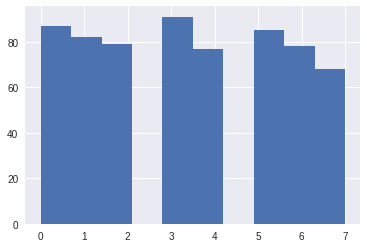

In [71]:
print("<Visiting records for those who passed the subway project")
describe_data(passing_visits.values())

<Visiting records for those who haven't passed the subway project
Mean:1.9051724137931034
Standard deviation:1.9057314413619046
Minimum:0
Maximum:7


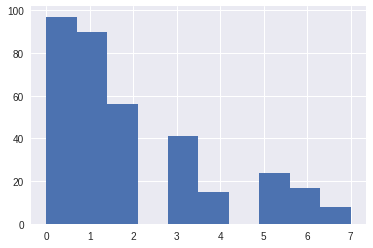

In [72]:
print("<Visiting records for those who haven't passed the subway project")
describe_data(non_passing_visits.values())

# [14] Improving Plots and Sharing Findings

Text(0.5, 1.0, 'Distribution of classroom visits in the first week for students who pass the subway project')

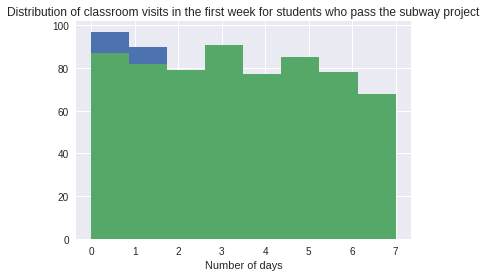

In [73]:
## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns

plt.hist(non_passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')

plt.hist(passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')